In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Energia compartilhada

In [150]:
solar_compartilhada = pd.read_csv('/kaggle/input/renewable-energy/solar-share-energy.csv')
solar_compartilhada.head()

In [151]:
solar_compartilhada.shape

In [152]:
solar_compartilhada.Entity.unique()

In [153]:
solar_compartilhada.info()

In [154]:
hidrica_compartilhada = pd.read_csv('/kaggle/input/renewable-energy/hydro-share-energy.csv')
hidrica_compartilhada.head()

In [155]:
hidrica_compartilhada.shape

In [156]:
hidrica_compartilhada.info()

In [157]:
eolica_compartilhada = pd.read_csv('/kaggle/input/renewable-energy/wind-share-energy.csv')
eolica_compartilhada.head()

In [158]:
eolica_compartilhada.shape

In [159]:
eolica_compartilhada.info()

In [160]:
renovavel_compartilhada = pd.read_csv('/kaggle/input/renewable-energy/renewable-share-energy.csv')
renovavel_compartilhada.head()

In [161]:
renovavel_compartilhada.shape

# Consumo de energia

In [162]:
hidrica_consumida = pd.read_csv('/kaggle/input/renewable-energy/hydropower-consumption.csv')
hidrica_consumida.head()

In [163]:
hidrica_consumida.info()

In [164]:
hidrica_consumida.shape

In [165]:
hidrica_consumida.Entity.unique()

In [166]:
solar_consumida = pd.read_csv('/kaggle/input/renewable-energy/solar-energy-consumption.csv')
solar_consumida.head()

In [167]:
solar_consumida.Entity.unique()

In [168]:
solar_consumida.shape

In [169]:
solar_consumida.info()

In [170]:
renovaveis_consumida = pd.read_csv('/kaggle/input/renewable-energy/modern-renewable-energy-consumption.csv')
renovaveis_consumida.head()

In [171]:
renovaveis_consumida.info()

In [172]:
renovaveis_consumida.shape

# Capacidade instalada

In [173]:
geotermica_instalada = pd.read_csv('/kaggle/input/renewable-energy/installed-geothermal-capacity.csv')
geotermica_instalada.head()

In [174]:
geotermica_instalada.info()

In [175]:
geotermica_instalada.shape

In [176]:
eolica_instalada = pd.read_csv('/kaggle/input/renewable-energy/cumulative-installed-wind-energy-capacity-gigawatts.csv')
eolica_instalada.head()

In [177]:
eolica_instalada.shape

In [178]:
eolica_instalada.info()

In [179]:
solar_instalada = pd.read_csv('/kaggle/input/renewable-energy/installed-solar-PV-capacity.csv')
solar_instalada.head()

In [180]:
solar_instalada.shape

In [181]:
solar_instalada.info()

# Produção de energia

In [182]:
renovaveis_produzida = pd.read_csv('/kaggle/input/renewable-energy/modern-renewable-prod.csv')
renovaveis_produzida.head()

In [183]:
renovaveis_produzida.shape

In [184]:
renovaveis_produzida.info()

In [185]:
biocomb_produzida = pd.read_csv('/kaggle/input/renewable-energy/biofuel-production.csv')
biocomb_produzida.head()

In [186]:
biocomb_produzida.shape

In [187]:
biocomb_produzida.info()

# Eletricidade compartilhada

In [188]:
elet_renovaveis_compartilhada = pd.read_csv('/kaggle/input/renewable-energy/share-electricity-renewables.csv')
elet_renovaveis_compartilhada.head()

In [189]:
elet_renovaveis_compartilhada.shape

In [190]:
elet_renovaveis_compartilhada.info()

In [191]:
elet_solar_compartilhada = pd.read_csv('/kaggle/input/renewable-energy/share-electricity-solar.csv')
elet_solar_compartilhada.head()

In [192]:
elet_solar_compartilhada.shape

In [193]:
elet_solar_compartilhada.info()

In [194]:
elet_eolica_compartilhada = pd.read_csv('/kaggle/input/renewable-energy/share-electricity-wind.csv')
elet_eolica_compartilhada.head()

In [195]:
elet_eolica_compartilhada.shape

In [196]:
elet_eolica_compartilhada.info()

In [197]:
elet_hidrica_compartilhada = pd.read_csv('/kaggle/input/renewable-energy/share-electricity-hydro.csv')
elet_hidrica_compartilhada.head()

In [198]:
elet_hidrica_compartilhada.shape

In [199]:
elet_hidrica_compartilhada.info()

## Geração eólica

In [200]:
geracao_eolica = pd.read_csv('/kaggle/input/renewable-energy/wind-generation.csv')
geracao_eolica.head()

In [201]:
geracao_eolica.shape

In [202]:
geracao_eolica.info()

# Datasets escolhidos:
* renovaveis_consumida
* renovaveis_produzida

## Consumo:

In [203]:
renovaveis_consumida.Entity.unique()

In [204]:
# Decidi trabalhar com dados do Brasil, Rússia, Índia, China e África do Sul, 
# porque estes países compõem o BRICS, que mesmo tendo um caráter informal,
# na época da formação do grupo, em 2009, foram considerados países emergentes, com características econômicas semelhantes.
# Fonte: https://www.todamateria.com.br/brics/

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("rocket")
sns.set_theme(style="darkgrid")

In [206]:
consumo_china = renovaveis_consumida[renovaveis_consumida['Entity'] == 'China']
consumo_china.head()

In [207]:
consumo_china.shape

In [208]:
consumo_china.describe()

Neste dataframe, temos os registros de 1965 até 2020 do consumo de energia chinês, ideal para analisar como foi o consumo de energias renováveis neste período. Mas ao tentar plotar um gráfico, obtive o seguinte resultado:

In [209]:
sns.lineplot(data=consumo_china)

In [210]:
# E ao tentar especificar a coluna 'Year' como eixo 'x', obtive o seguinte resultado:
sns.lineplot(data=consumo_china, x='Year', y = 'Hydro Generation - TWh');

# Teria que criar um gráfico para cada 

A saída que encontrei foi:
* criar cópias deste dataframe, 
* excluir três colunas de fontes,
* criar uma coluna para armazenar o nome da fonte que sobrou
* depois fazer um 'append' dos dataframes

In [211]:
consumo_china.reset_index(drop = True, inplace = True)
consumo_china.head()

In [212]:
consumo_china_eolica = consumo_china.copy()
consumo_china_eolica.sample(10)

In [213]:
# Excluindo três colunas (solar, hidro e geo biomassa)
consumo_china_eolica.drop(['Code', 'Solar Generation - TWh', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_china_eolica.head()

In [214]:
consumo_china_eolica = consumo_china_eolica.assign(Fonte = 'Wind')
consumo_china_eolica.rename(columns = {'Wind Generation - TWh':'Consumo - TWh'}, inplace = True)
consumo_china_eolica.head()

In [215]:
# Criando outra cópia do dataset da China
# Solar:
consumo_china_solar = consumo_china.copy()
consumo_china_solar.drop(['Code', 'Wind Generation - TWh', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_china_solar['Fonte'] = 'Solar'
consumo_china_solar.rename(columns = {'Solar Generation - TWh':'Consumo - TWh'}, inplace = True)
consumo_china_solar.head()

In [216]:
# Criando outra cópia do dataset da China
# Geo, biomassa e outros:
consumo_china_geo_biomass = consumo_china.copy()
consumo_china_geo_biomass.drop(['Code', 'Wind Generation - TWh', 'Solar Generation - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_china_geo_biomass['Fonte'] = 'Geo Biomass Other'
consumo_china_geo_biomass.rename(columns = {'Geo Biomass Other - TWh':'Consumo - TWh'}, inplace = True)
consumo_china_geo_biomass.head()

In [217]:
# Criando outra cópia do dataset da China
# Hidro:
consumo_china_hidro = consumo_china.copy()
consumo_china_hidro.drop(['Code', 'Wind Generation - TWh', 'Geo Biomass Other - TWh', 'Solar Generation - TWh'], axis = 1, inplace = True)
consumo_china_hidro['Fonte'] = 'Hidro'
consumo_china_hidro.rename(columns = {'Hydro Generation - TWh':'Consumo - TWh'}, inplace = True)
consumo_china_hidro.head()

In [218]:
# Juntando os dataframes criados
dados_consumo_china = consumo_china_eolica.append(consumo_china_solar)
dados_consumo_china.head()

In [219]:
dados_consumo_china = dados_consumo_china.append(consumo_china_geo_biomass)
dados_consumo_china = dados_consumo_china.append(consumo_china_hidro)
dados_consumo_china.reset_index(drop = True, inplace = True)
dados_consumo_china.head()

In [220]:
sns.set_style('darkgrid')
ax = sns.lineplot(data=dados_consumo_china, x = 'Year', y = 'Consumo - TWh', hue = 'Fonte')
ax.figure.set_size_inches(15, 8)
ax.set_title('Consumo de energias renováveis - China (TWh)', fontsize = 18);

### Consumo das energias renováveis no Brasil

In [221]:
def selecionando_o_pais(country):
    return renovaveis_consumida[renovaveis_consumida['Entity'] == country]

In [222]:
consumo_brasil = selecionando_o_pais('Brazil')
consumo_brasil.reset_index(drop = True, inplace = True)
consumo_brasil.head()

In [223]:
# Fazendo as quatro cópias do dataframe sobre o Brasil:

consumo_brasil_eolica = consumo_brasil.copy()
consumo_brasil_eolica.drop(['Code', 'Solar Generation - TWh', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_brasil_eolica['Fonte'] = 'Wind'
consumo_brasil_eolica.rename(columns = {'Wind Generation - TWh':'Consumo - TWh'}, inplace = True)

consumo_brasil_solar = consumo_brasil.copy()
consumo_brasil_solar.drop(['Code', 'Wind Generation - TWh', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_brasil_solar['Fonte'] = 'Solar'
consumo_brasil_solar.rename(columns = {'Solar Generation - TWh':'Consumo - TWh'}, inplace = True)

consumo_brasil_geo_biomass = consumo_brasil.copy()
consumo_brasil_geo_biomass.drop(['Code', 'Wind Generation - TWh', 'Solar Generation - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_brasil_geo_biomass['Fonte'] = 'Geo Biomass Other'
consumo_brasil_geo_biomass.rename(columns = {'Geo Biomass Other - TWh':'Consumo - TWh'}, inplace = True)

consumo_brasil_hidro = consumo_brasil.copy()
consumo_brasil_hidro.drop(['Code', 'Wind Generation - TWh', 'Geo Biomass Other - TWh', 'Solar Generation - TWh'], axis = 1, inplace = True)
consumo_brasil_hidro['Fonte'] = 'Hidro'
consumo_brasil_hidro.rename(columns = {'Hydro Generation - TWh':'Consumo - TWh'}, inplace = True)

In [224]:
# Juntando os dataframes criados

dados_consumo_brasil = consumo_brasil_eolica.append(consumo_brasil_solar)
dados_consumo_brasil = dados_consumo_brasil.append(consumo_brasil_geo_biomass)
dados_consumo_brasil = dados_consumo_brasil.append(consumo_brasil_hidro)
dados_consumo_brasil.reset_index(drop = True, inplace = True)
dados_consumo_brasil.sample(10)

In [225]:
# Gerando o gráfico - Brasil

ax = sns.lineplot(data=dados_consumo_brasil, x = 'Year', y = 'Consumo - TWh', hue = 'Fonte')
ax.figure.set_size_inches(15, 8)
ax.set_title('Consumo de energias renováveis - Brasil (TWh)', fontsize = 18);

### Consumo das energias renováveis na África do Sul

In [226]:
consumo_africa_do_sul = selecionando_o_pais('South Africa')
consumo_africa_do_sul.reset_index(drop = True, inplace = True)
consumo_africa_do_sul.head()

In [227]:
# Fazendo as quatro cópias do dataframe sobre a África do Sul:

consumo_AS_eolica = consumo_africa_do_sul.copy()
consumo_AS_eolica.drop(['Code', 'Solar Generation - TWh', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_AS_eolica['Fonte'] = 'Wind'
consumo_AS_eolica.rename(columns = {'Wind Generation - TWh':'Consumo - TWh'}, inplace = True)

consumo_AS_solar = consumo_africa_do_sul.copy()
consumo_AS_solar.drop(['Code', 'Wind Generation - TWh', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_AS_solar['Fonte'] = 'Solar'
consumo_AS_solar.rename(columns = {'Solar Generation - TWh':'Consumo - TWh'}, inplace = True)

consumo_AS_geo_biomass = consumo_africa_do_sul.copy()
consumo_AS_geo_biomass.drop(['Code', 'Wind Generation - TWh', 'Solar Generation - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_AS_geo_biomass['Fonte'] = 'Geo Biomass Other'
consumo_AS_geo_biomass.rename(columns = {'Geo Biomass Other - TWh':'Consumo - TWh'}, inplace = True)

consumo_AS_hidro = consumo_africa_do_sul.copy()
consumo_AS_hidro.drop(['Code', 'Wind Generation - TWh', 'Geo Biomass Other - TWh', 'Solar Generation - TWh'], axis = 1, inplace = True)
consumo_AS_hidro['Fonte'] = 'Hidro'
consumo_AS_hidro.rename(columns = {'Hydro Generation - TWh':'Consumo - TWh'}, inplace = True)

In [228]:
dados_consumo_AS = consumo_AS_eolica.append(consumo_AS_solar)
dados_consumo_AS = dados_consumo_AS.append(consumo_AS_geo_biomass)
dados_consumo_AS = dados_consumo_AS.append(consumo_AS_hidro)
dados_consumo_AS.reset_index(drop = True, inplace = True)
dados_consumo_AS.sample(10)

In [229]:
# Gerando o gráfico - África do Sul

ax = sns.lineplot(data=dados_consumo_AS, x = 'Year', y = 'Consumo - TWh', hue = 'Fonte')
ax.figure.set_size_inches(15, 8)
ax.set_title('Consumo de energias renováveis - África do Sul (TWh)', fontsize = 18);

### Consumo das energias renováveis na Índia

In [230]:
consumo_india = selecionando_o_pais('India')
consumo_india.reset_index(drop = True, inplace = True)
consumo_india.head()

In [231]:
# Fazendo as quatro cópias do dataframe sobre a Índia:

consumo_india_eolica = consumo_india.copy()
consumo_india_eolica.drop(['Code', 'Solar Generation - TWh', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_india_eolica['Fonte'] = 'Wind'
consumo_india_eolica.rename(columns = {'Wind Generation - TWh':'Consumo - TWh'}, inplace = True)

consumo_india_solar = consumo_india.copy()
consumo_india_solar.drop(['Code', 'Wind Generation - TWh', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_india_solar['Fonte'] = 'Solar'
consumo_india_solar.rename(columns = {'Solar Generation - TWh':'Consumo - TWh'}, inplace = True)

consumo_india_geo_biomass = consumo_india.copy()
consumo_india_geo_biomass.drop(['Code', 'Wind Generation - TWh', 'Solar Generation - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_india_geo_biomass['Fonte'] = 'Geo Biomass Other'
consumo_india_geo_biomass.rename(columns = {'Geo Biomass Other - TWh':'Consumo - TWh'}, inplace = True)

consumo_india_hidro = consumo_india.copy()
consumo_india_hidro.drop(['Code', 'Wind Generation - TWh', 'Geo Biomass Other - TWh', 'Solar Generation - TWh'], axis = 1, inplace = True)
consumo_india_hidro['Fonte'] = 'Hidro'
consumo_india_hidro.rename(columns = {'Hydro Generation - TWh':'Consumo - TWh'}, inplace = True)

In [232]:
dados_consumo_india = consumo_india_eolica.append(consumo_india_solar)
dados_consumo_india = dados_consumo_india.append(consumo_india_geo_biomass)
dados_consumo_india = dados_consumo_india.append(consumo_india_hidro)
dados_consumo_india.reset_index(drop = True, inplace = True)
dados_consumo_india.sample(10)

In [233]:
# Gerando o gráfico - Índia

ax = sns.lineplot(data=dados_consumo_india, x = 'Year', y = 'Consumo - TWh', hue = 'Fonte')
ax.figure.set_size_inches(15, 8)
ax.set_title('Consumo de energias renováveis - Índia (TWh)', fontsize = 18);

### Consumo das energias renováveis na Rússia

In [234]:
consumo_russia = selecionando_o_pais('Russia')
consumo_russia.reset_index(drop = True, inplace = True)
consumo_russia.head()

In [235]:
# Fazendo as quatro cópias do dataframe sobre a Índia:

consumo_russia_eolica = consumo_russia.copy()
consumo_russia_eolica.drop(['Code', 'Solar Generation - TWh', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_russia_eolica['Fonte'] = 'Wind'
consumo_russia_eolica.rename(columns = {'Wind Generation - TWh':'Consumo - TWh'}, inplace = True)

consumo_russia_solar = consumo_russia.copy()
consumo_russia_solar.drop(['Code', 'Wind Generation - TWh', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_russia_solar['Fonte'] = 'Solar'
consumo_russia_solar.rename(columns = {'Solar Generation - TWh':'Consumo - TWh'}, inplace = True)

consumo_russia_geo_biomass = consumo_russia.copy()
consumo_russia_geo_biomass.drop(['Code', 'Wind Generation - TWh', 'Solar Generation - TWh', 'Hydro Generation - TWh'], axis = 1, inplace = True)
consumo_russia_geo_biomass['Fonte'] = 'Geo Biomass Other'
consumo_russia_geo_biomass.rename(columns = {'Geo Biomass Other - TWh':'Consumo - TWh'}, inplace = True)

consumo_russia_hidro = consumo_russia.copy()
consumo_russia_hidro.drop(['Code', 'Wind Generation - TWh', 'Geo Biomass Other - TWh', 'Solar Generation - TWh'], axis = 1, inplace = True)
consumo_russia_hidro['Fonte'] = 'Hidro'
consumo_russia_hidro.rename(columns = {'Hydro Generation - TWh':'Consumo - TWh'}, inplace = True)

In [236]:
dados_consumo_russia = consumo_russia_eolica.append(consumo_russia_solar)
dados_consumo_russia = dados_consumo_russia.append(consumo_russia_geo_biomass)
dados_consumo_russia = dados_consumo_russia.append(consumo_russia_hidro)
dados_consumo_russia.reset_index(drop = True, inplace = True)
dados_consumo_russia.sample(10)

In [237]:
# Gerando o gráfico - Rússia

ax = sns.lineplot(data=dados_consumo_russia, x = 'Year', y = 'Consumo - TWh', hue = 'Fonte')
ax.figure.set_size_inches(15, 8)
ax.set_title('Consumo de energias renováveis - Rússia (TWh)', fontsize = 18);

Diante os gráficos, a África do Sul possui os menores valores de consumo de energias renováveis e com o menor consumo de energia proveniente de hidrelétricas. Nos demais países, o consumo total é superior a 200 TWh, em que o maior consumo é proveniente de hidrelétricas. 

Quando se trata de consumo por tipo de fonte, nenhum país supera a China, que tem geração solar, eólica, biomassa e outros maior do que todos os outros países:

In [238]:
consumo_2020_russia = consumo_russia.tail(1)
consumo_2020_russia

In [239]:
consumo_2020_india = consumo_india.tail(1)
consumo_2020_india

In [240]:
consumo_2020_as = consumo_africa_do_sul.tail(1)
consumo_2020_as

In [241]:
consumo_2020_brasil = consumo_brasil.tail(1)
consumo_2020_brasil

In [242]:
consumo_brics_sem_china = consumo_2020_russia.append(consumo_2020_india)
consumo_brics_sem_china = consumo_brics_sem_china.append(consumo_2020_as)
consumo_brics_sem_china = consumo_brics_sem_china.append(consumo_2020_brasil)
consumo_brics_sem_china.reset_index(drop = True, inplace = True)
consumo_brics_sem_china

In [243]:
# Soma do consumo dos 4 países em 2020

consumo_brics_sem_china.groupby('Year').sum()

In [244]:
consumo_china.tail(1)

De fato, nem a soma dos demais países se aproxima do consumo chinês.

## Produção:

Executando a mesma análise com a produção do BRICS:

In [245]:
renovaveis_produzida

In [246]:
renovaveis_produzida.Entity.unique()

In [247]:
# Brasil

producao_brasil = renovaveis_produzida[renovaveis_produzida['Entity'] == 'Brazil']
producao_brasil.head()

In [248]:
producao_brasil.describe()

In [249]:
# Fazendo as quatro cópias do dataframe sobre o Brasil:

producao_brasil_eolica = producao_brasil.copy()
producao_brasil_eolica.drop(['Code', 'Electricity from solar (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                             'Electricity from hydro (TWh)'], axis = 1, inplace = True)
producao_brasil_eolica['Fonte'] = 'Wind'
producao_brasil_eolica.rename(columns = {'Electricity from wind (TWh)':'Produção - TWh'}, inplace = True)

producao_brasil_solar = producao_brasil.copy()
producao_brasil_solar.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                            'Electricity from hydro (TWh)'], axis = 1, inplace = True)
producao_brasil_solar['Fonte'] = 'Solar'
producao_brasil_solar.rename(columns = {'Electricity from solar (TWh)':'Produção - TWh'}, inplace = True)

producao_brasil_geo_biomass = producao_brasil.copy()
producao_brasil_geo_biomass.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from solar (TWh)', 'Electricity from hydro (TWh)'],
                                axis = 1, inplace = True)
producao_brasil_geo_biomass['Fonte'] = 'Geo Biomass Other'
producao_brasil_geo_biomass.rename(columns = {'Electricity from other renewables including bioenergy (TWh)':'Produção - TWh'}, inplace = True)

producao_brasil_hidro = producao_brasil.copy()
producao_brasil_hidro.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                           'Electricity from solar (TWh)'], axis = 1, inplace = True)
producao_brasil_hidro['Fonte'] = 'Hidro'
producao_brasil_hidro.rename(columns = {'Electricity from hydro (TWh)':'Produção - TWh'}, inplace = True)

In [250]:
dados_producao_brasil = producao_brasil_eolica.append(producao_brasil_solar)
dados_producao_brasil = dados_producao_brasil.append(producao_brasil_geo_biomass)
dados_producao_brasil = dados_producao_brasil.append(producao_brasil_hidro)
dados_producao_brasil.reset_index(drop = True, inplace = True)
dados_producao_brasil.sample(10)

In [251]:
# Rússia

producao_russia = renovaveis_produzida[renovaveis_produzida['Entity'] == 'Russia']
producao_russia.head()

Ao fazer a separação dos dados por país, a Rússia tem 20 anos de registro a menos que os demais países. Eu não encontrei nenhum fato histórico que justificasse os registros à partir de 1985, além do fato da União Soviética estar em um período de decadência, segundo Neves (Fonte: https://brasilescola.uol.com.br/historiag/uniao-sovietica.htm)

In [252]:
producao_russia.describe()

In [253]:
# Fazendo as quatro cópias do dataframe (Rússia):

producao_russia_eolica = producao_russia.copy()
producao_russia_eolica.drop(['Code', 'Electricity from solar (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                             'Electricity from hydro (TWh)'], axis = 1, inplace = True)
producao_russia_eolica['Fonte'] = 'Wind'
producao_russia_eolica.rename(columns = {'Electricity from wind (TWh)':'Produção - TWh'}, inplace = True)

producao_russia_solar = producao_russia.copy()
producao_russia_solar.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                            'Electricity from hydro (TWh)'], axis = 1, inplace = True)
producao_russia_solar['Fonte'] = 'Solar'
producao_russia_solar.rename(columns = {'Electricity from solar (TWh)':'Produção - TWh'}, inplace = True)

producao_russia_geo_biomass = producao_russia.copy()
producao_russia_geo_biomass.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from solar (TWh)', 'Electricity from hydro (TWh)'],
                                axis = 1, inplace = True)
producao_russia_geo_biomass['Fonte'] = 'Geo Biomass Other'
producao_russia_geo_biomass.rename(columns = {'Electricity from other renewables including bioenergy (TWh)':'Produção - TWh'}, inplace = True)

producao_russia_hidro = producao_russia.copy()
producao_russia_hidro.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                           'Electricity from solar (TWh)'], axis = 1, inplace = True)
producao_russia_hidro['Fonte'] = 'Hidro'
producao_russia_hidro.rename(columns = {'Electricity from hydro (TWh)':'Produção - TWh'}, inplace = True),

dados_producao_russia = producao_russia_eolica.append(producao_russia_solar)
dados_producao_russia = dados_producao_russia.append(producao_russia_geo_biomass)
dados_producao_russia = dados_producao_russia.append(producao_russia_hidro)
dados_producao_russia.reset_index(drop = True, inplace = True)

In [254]:
dados_producao_russia.sample(10)

In [255]:
# Índia

producao_india = renovaveis_produzida[renovaveis_produzida['Entity'] == 'India']
producao_india.head()

In [256]:
producao_india.describe()

In [257]:
# Fazendo as quatro cópias do dataframe (Índia):

producao_india_eolica = producao_india.copy()
producao_india_eolica.drop(['Code', 'Electricity from solar (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                             'Electricity from hydro (TWh)'], axis = 1, inplace = True)
producao_india_eolica['Fonte'] = 'Wind'
producao_india_eolica.rename(columns = {'Electricity from wind (TWh)':'Produção - TWh'}, inplace = True)

producao_india_solar = producao_india.copy()
producao_india_solar.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                            'Electricity from hydro (TWh)'], axis = 1, inplace = True)
producao_india_solar['Fonte'] = 'Solar'
producao_india_solar.rename(columns = {'Electricity from solar (TWh)':'Produção - TWh'}, inplace = True)

producao_india_geo_biomass = producao_india.copy()
producao_india_geo_biomass.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from solar (TWh)', 'Electricity from hydro (TWh)'],
                                axis = 1, inplace = True)
producao_india_geo_biomass['Fonte'] = 'Geo Biomass Other'
producao_india_geo_biomass.rename(columns = {'Electricity from other renewables including bioenergy (TWh)':'Produção - TWh'}, inplace = True)

producao_india_hidro = producao_india.copy()
producao_india_hidro.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                           'Electricity from solar (TWh)'], axis = 1, inplace = True)
producao_india_hidro['Fonte'] = 'Hidro'
producao_india_hidro.rename(columns = {'Electricity from hydro (TWh)':'Produção - TWh'}, inplace = True),

dados_producao_india = producao_india_eolica.append(producao_india_solar)
dados_producao_india = dados_producao_india.append(producao_india_geo_biomass)
dados_producao_india = dados_producao_india.append(producao_india_hidro)
dados_producao_india.reset_index(drop = True, inplace = True)

In [258]:
dados_producao_india.sample(10)

In [259]:
# China

producao_china = renovaveis_produzida[renovaveis_produzida['Entity'] == 'China']
producao_china.head()

In [260]:
producao_china.describe()

In [261]:
# Fazendo as quatro cópias do dataframe (China):

producao_china_eolica = producao_china.copy()
producao_china_eolica.drop(['Code', 'Electricity from solar (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                             'Electricity from hydro (TWh)'], axis = 1, inplace = True)
producao_china_eolica['Fonte'] = 'Wind'
producao_china_eolica.rename(columns = {'Electricity from wind (TWh)':'Produção - TWh'}, inplace = True)

producao_china_solar = producao_china.copy()
producao_china_solar.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                            'Electricity from hydro (TWh)'], axis = 1, inplace = True)
producao_china_solar['Fonte'] = 'Solar'
producao_china_solar.rename(columns = {'Electricity from solar (TWh)':'Produção - TWh'}, inplace = True)

producao_china_geo_biomass = producao_china.copy()
producao_china_geo_biomass.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from solar (TWh)', 'Electricity from hydro (TWh)'],
                                axis = 1, inplace = True)
producao_china_geo_biomass['Fonte'] = 'Geo Biomass Other'
producao_china_geo_biomass.rename(columns = {'Electricity from other renewables including bioenergy (TWh)':'Produção - TWh'}, inplace = True)

producao_china_hidro = producao_china.copy()
producao_china_hidro.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                           'Electricity from solar (TWh)'], axis = 1, inplace = True)
producao_china_hidro['Fonte'] = 'Hidro'
producao_china_hidro.rename(columns = {'Electricity from hydro (TWh)':'Produção - TWh'}, inplace = True),

dados_producao_china = producao_china_eolica.append(producao_china_solar)
dados_producao_china = dados_producao_china.append(producao_china_geo_biomass)
dados_producao_china = dados_producao_china.append(producao_china_hidro)
dados_producao_china.reset_index(drop = True, inplace = True)

In [262]:
dados_producao_china.sample(10)

In [263]:
# África do Sul

producao_africa_sul = renovaveis_produzida[renovaveis_produzida['Entity'] == 'South Africa']
producao_africa_sul.head()

In [264]:
producao_africa_sul.describe()

In [265]:
# Fazendo as quatro cópias do dataframe (África do Sul):

producao_africa_sul_eolica = producao_africa_sul.copy()
producao_africa_sul_eolica.drop(['Code', 'Electricity from solar (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                             'Electricity from hydro (TWh)'], axis = 1, inplace = True)
producao_africa_sul_eolica['Fonte'] = 'Wind'
producao_africa_sul_eolica.rename(columns = {'Electricity from wind (TWh)':'Produção - TWh'}, inplace = True)

producao_africa_sul_solar = producao_africa_sul.copy()
producao_africa_sul_solar.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                            'Electricity from hydro (TWh)'], axis = 1, inplace = True)
producao_africa_sul_solar['Fonte'] = 'Solar'
producao_africa_sul_solar.rename(columns = {'Electricity from solar (TWh)':'Produção - TWh'}, inplace = True)

producao_africa_sul_geo_biomass = producao_africa_sul.copy()
producao_africa_sul_geo_biomass.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from solar (TWh)', 'Electricity from hydro (TWh)'],
                                axis = 1, inplace = True)
producao_africa_sul_geo_biomass['Fonte'] = 'Geo Biomass Other'
producao_africa_sul_geo_biomass.rename(columns = {'Electricity from other renewables including bioenergy (TWh)':'Produção - TWh'}, inplace = True)

producao_africa_sul_hidro = producao_africa_sul.copy()
producao_africa_sul_hidro.drop(['Code', 'Electricity from wind (TWh)', 'Electricity from other renewables including bioenergy (TWh)',
                           'Electricity from solar (TWh)'], axis = 1, inplace = True)
producao_africa_sul_hidro['Fonte'] = 'Hidro'
producao_africa_sul_hidro.rename(columns = {'Electricity from hydro (TWh)':'Produção - TWh'}, inplace = True),

dados_producao_africa_sul = producao_africa_sul_eolica.append(producao_africa_sul_solar)
dados_producao_africa_sul = dados_producao_africa_sul.append(producao_africa_sul_geo_biomass)
dados_producao_africa_sul = dados_producao_africa_sul.append(producao_africa_sul_hidro)
dados_producao_africa_sul.reset_index(drop = True, inplace = True)

In [266]:
dados_producao_africa_sul.sample(10)

### Plotando gráficos de Produção de energia

In [267]:
def plotando_grafico(dataset, titulo):
    ax = sns.lineplot(data = dataset, x = 'Year', y = 'Produção - TWh', hue = 'Fonte')
    ax.figure.set_size_inches(15, 8)
    ax.set_title(titulo, fontsize = 18);

In [268]:
plotando_grafico(dados_producao_brasil, 'Produção - Brasil (TWh)')

In [269]:
plotando_grafico(dados_producao_russia, 'Produção - Rússia (TWh)')

In [270]:
plotando_grafico(dados_producao_india, 'Produção - India (TWh)')

In [271]:
plotando_grafico(dados_producao_china, 'Produção - China (TWh)')

In [272]:
plotando_grafico(dados_producao_africa_sul, 'Produção - África do Sul (TWh)')

### Conclusão:

O padrão visto nos gráficos de consumo de energia são similares aos gráficos de produção, com pequenas ressalvas, além da quantidade menor de informação sobre a Rússia, a base de dados original possuía informações até 2021.

Por exemplo, a partir dos anos 2000, a linha referente a geração hidrelétrica da África do Sul se diferencia do consumo. Ao ponto de colocar a geração hídrica em segundo lugar, “perdendo” apenas para a geração eólica.

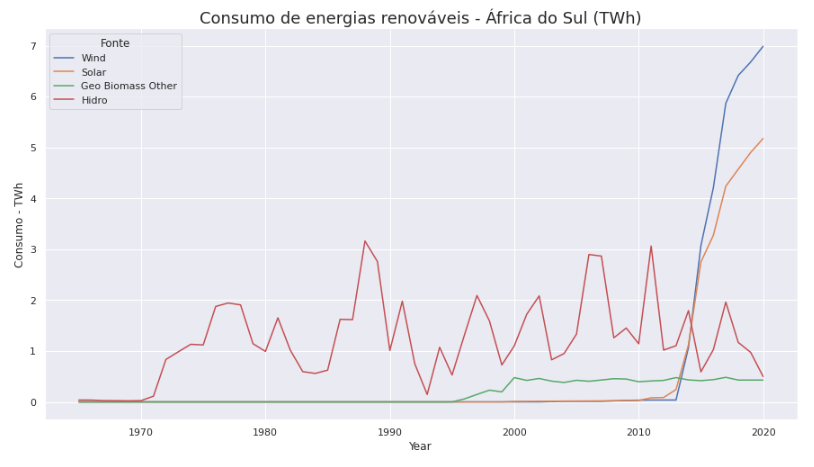

Com exceção da Rússia, os gráficos de geração dos demais países são semelhantes aos gráficos de consumo. 

Por curiosidade, fui conferir se os dados sobre o Brasil eram iguais aos que a EPE disponibiliza. Para facilitar a conferência, busquei pelos dois últimos anos presentes nos datasets que trabalhei:

In [273]:
producao_brasil.tail(2)

In [274]:
consumo_brasil.tail(2)

Escolhi o site BEN Interativo para fazer a conferência, pois achei mais fácil conferir os registros dos anos. Link: http://shinyepe.brazilsouth.cloudapp.azure.com:3838/ben/

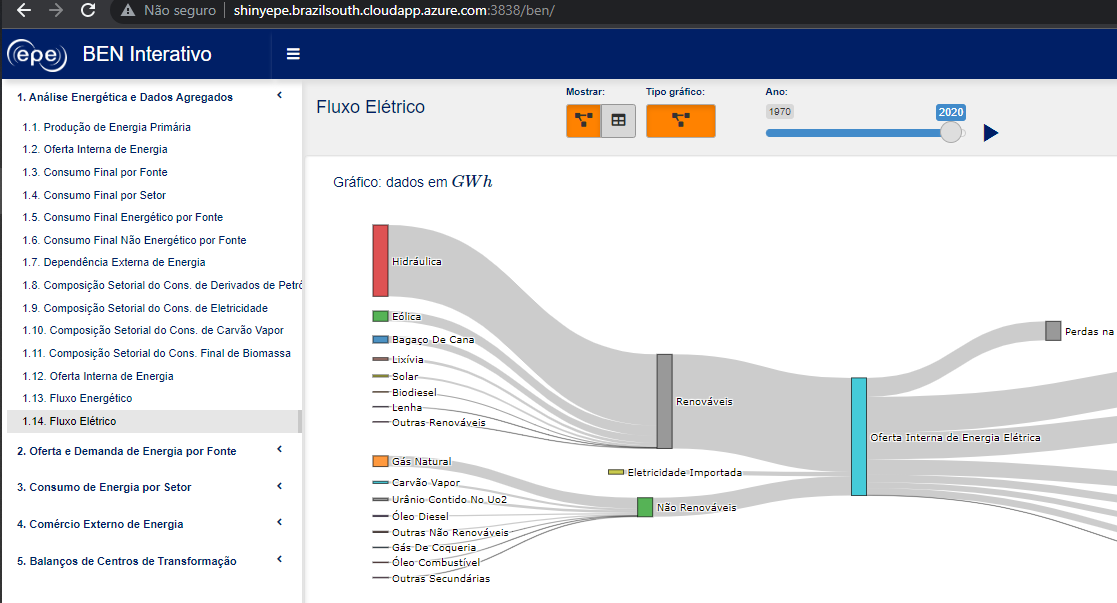


As informações sobre a matriz elétrica (EPE) estão próximas do dataset (consumo_brasil), em relação ao consumo de energia hidrelétrica e eólica, porém, com uma diferença significativa na geração solar:

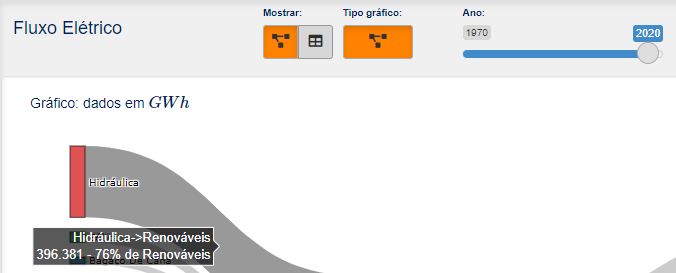

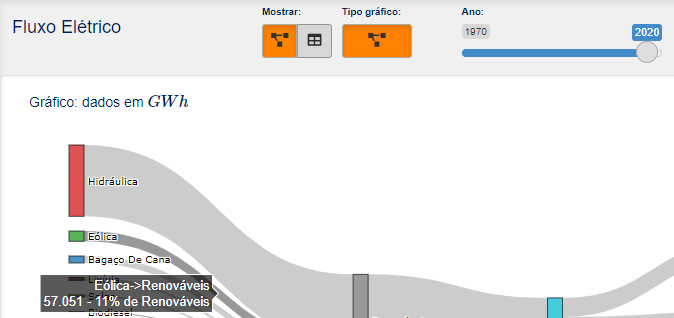

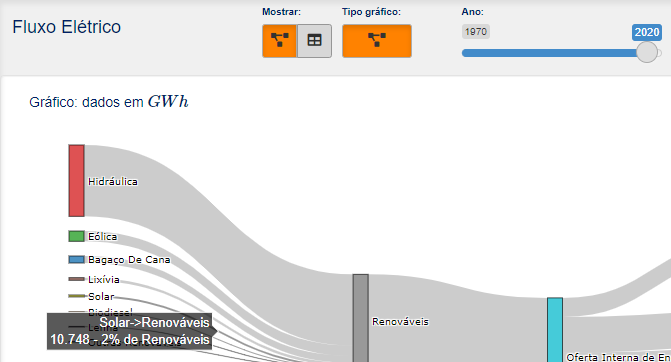

Mas, enquanto o dataset está em TWh, os dados da EPE estão em GWh, que é uma diferença de 1T = 1000G

Aqui, posso levantar duas hipóteses: 
- Não fizeram a conversão, de Giga para Tera, na hora de fazer o dataset;
- Ou a fonte usada para fazer o dataset é outra e que desconheço.


Voltando à minha curiosidade, eu quis conferir se os dados presentes no dataset estavam mais próximos da matriz energética ou matriz elétrica. Porém, independente do tipo da matriz, eu chegaria à mesma conclusão: Com exceção da Rússia, nos outros países há uma maior participação das energias renováveis, diferente da hídrica.

In [275]:
producao_2021_brasil = producao_brasil.tail(1)
producao_2021_brasil

In [276]:
producao_2021_india = producao_india.tail(2)
producao_2021_india

In [277]:
producao_2021_china = producao_china.tail(2)
producao_2021_china

In [278]:
producao_2021_a_s = producao_africa_sul.tail(1)
producao_2021_a_s

In [279]:
dados_producao2021 = producao_2021_brasil.append(producao_2021_india)
dados_producao2021 = dados_producao2021.append(producao_2021_china)
dados_producao2021 = dados_producao2021.append(producao_2021_a_s)
dados_producao2021.reset_index(drop = True, inplace = True)
dados_producao2021

In [280]:
dados_producao2021['Produção Total (TWh)'] = dados_producao2021.sum(axis = 1) - dados_producao2021['Year']
dados_producao2021

In [281]:
dados_producao2021['% Eólica'] = (dados_producao2021['Electricity from wind (TWh)'] / dados_producao2021['Produção Total (TWh)']) * 100
dados_producao2021

In [282]:
dados_producao2021['% Hidro'] = (dados_producao2021['Electricity from hydro (TWh)'] / dados_producao2021['Produção Total (TWh)']) * 100
dados_producao2021

In [283]:
dados_producao2021['% Solar'] = (dados_producao2021['Electricity from solar (TWh)'] / dados_producao2021['Produção Total (TWh)']) * 100
dados_producao2021

In [284]:
dados_producao2021['% Outras'] = (dados_producao2021['Electricity from other renewables including bioenergy (TWh)'] / dados_producao2021['Produção Total (TWh)']) * 100
dados_producao2021

In [285]:
porcentagem_2020 = dados_producao2021.drop(columns=['Code', 'Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
                                                   'Electricity from solar (TWh)', 'Electricity from other renewables including bioenergy (TWh)'])
porcentagem_2020

In [286]:
porcentagem_2020 = porcentagem_2020.drop(columns=['Produção Total (TWh)'])
porcentagem_2020

In [287]:
porcentagem_2020 = porcentagem_2020.drop([2, 4])
porcentagem_2020

### Plotando gráficos da porcentagem por tipo de fonte

In [288]:
def plot_porcentagem(dataset, titulo):
    ax = sns.barplot(data = dataset)
    ax.figure.set_size_inches(15, 8)
    ax.set_title('Produção {}'.format(titulo), loc='center', fontsize = 18)
    ax.set_xlabel('Fontes', fontsize = 14)
    ax.set_ylabel('Porcentagem de geração', fontsize = 14)
    ax = ax

In [289]:
porcentagem_brasil = porcentagem_2020.drop(columns=['Year'])
porcentagem_brasil = porcentagem_brasil.drop([1, 3, 5])
porcentagem_brasil

In [290]:
plot_porcentagem(porcentagem_brasil, '2021 - Brasil')

In [291]:
porcentagem_india = porcentagem_2020.drop(columns=['Year'])
porcentagem_india = porcentagem_india.drop([0, 3, 5])
porcentagem_india

In [292]:
plot_porcentagem(porcentagem_india, '2020 - Índia')

In [293]:
porcentagem_china = porcentagem_2020.drop([0, 1, 5])
porcentagem_china = porcentagem_china.drop(columns=['Year'])
porcentagem_china

In [294]:
plot_porcentagem(porcentagem_china, '2020 - China')

In [295]:
porcentagem_africa_do_sul = porcentagem_2020.drop([0, 1, 3])
porcentagem_africa_do_sul = porcentagem_africa_do_sul.drop(columns=['Year'])
porcentagem_africa_do_sul

In [296]:
plot_porcentagem(porcentagem_africa_do_sul, '2021 - China')

No Brasil, as usinas hidrelétricas são responsáveis por gerar mais de 70% da energia entre as renováveis. Enquanto nos outros países, a porcentagem é de no máximo 60% e com maior participação de outras fontes, como a eólica, solar, biomassa e geotérmica.